
## Intro

This blog post is reflecting on the last assignment done in EDS232 of the Bren MEDS program. We were given data from CalCOFI, an orgainzation that has existed over 70 years and conducts important oceanographic research. In this blog post, I will flesh out some of the work done in the assignment and add context around the importance of dissolved inorganic compounds in climate conservation efforts.

## What's DIC?

Dissolved inorganic carbon (DIC) plays a critical role in the ocean's carbon cycle and has significant implications on the health of marine life, in addition to more general climate change impacts. Image this: instead of being fluid, the ocean is a massive sponge that soaks up carbon dioxide from the atmosphere. Over time, the carbon dioxide dissolves into the water and transforms into different kinds of dissolved inorganic carbon, like carbonic acid and bicarbonate (I won't cover the chemistry of this transition, but you can learn more about that at [@ScienceDirect]). These forms of DIC are kept stable by the pH levels of the ocean (roughly 8.1). Now imagine the sponge again, already full, trying to squeeze in more carbon dioxide. This is where things are at now: more carbon dioxide gets stuffed into the atmosphere by burning fossil fuels and cutting down forests, which is causing the oceans to absord more carbon dioxide than they are ready to handle. Despite this, oceans will continue to soak in carbon dioxide. As a result, the amount of carbon dioxide absorbed by the ocean leads to a process called ocean acidification. The greater carbon dioxide absorption causes a shift in the delicate balance of DIC in the ocean, leading to a decrease in the ocean's pH level. Marine life, and everything that relies on it, are and will be the first to pay the price of this devastating effect, and ripples of the acidification process will be felt in every corner of the planet.

Ocean acidification can have serious consequences on marine organisms that rely on calcification to build their skeletons and shells, such as coral, plankton, crabs, lobsters, and more. Coral reefs are home to an abundance of life. Often referred to as the rainforests of the sea, coral reefs cover less than one percent of the ocean floor but support about 25 percent of all known marine species. As the ocean gets more acidic (when the pH lowers), there is a lower supply of carbonate ions which in turns makes it challening for these organisms to  build their essential body structures. This reminds me of a situation where the half of the wood on Earth gets infested with something and is unusable, causing the construction industry to go down, then all goods-producing industries, then subsequently every other industry in the global economy to just crash and burn. Coral reefs have it even worse than the shellfish since they face the impact of reduced calcification rates and higher rates of dissolution of their calcium carbonate structures (or backbone). To make maters worse, rising ocean temperatures and deviations in typical oceanographic patterns can impact the spread and cycle of DIC across the ocean. Warmer waters aren't able to absorb as much carbon dioxide, so as the ocean rises it is likely going to be the case that less carbon is actually drawn from the atmosphere and absorbed by the ocean. Double whammie! Ocean acidification has extreme consequences, and it is our obligation to limit it as best we can.

Here is what can be done: reduce our carbon emissions and restore coastal ecosystems, and we could be in luck! 

## Importance of Predicting DIC

### Using ML
If we want to tackle the challenges posed by ocean acidification and climate change, we need to be able to predict DIC levels accurately. This is where machine learning comes in to play.

By harnessing the power of data and algorithms, we can develop models that help us assess the extent of ocean acidification across different locations and time scales. This is critical for understanding the potential impacts on marine ecosystems and identifying the areas that are most vulnerable. Predicting DIC levels also enables us to establish specific, tailored, and powerful mitigation strategies. By anticipating future changes in DIC and their consequences, we can make informed, (hopefully) accurate decisions about how to allocate resources, prioritize conservation efforts, and adapt management approaches. Sounds wonderful, and even feasible?

In this analysis, my goal is to build a predictive model for DIC using machine learning approaches. I found that XGBoost, a powerful algorithm known for its ability to handle complex relationships and deliver accurate predictions, was the best performer on the data set we were given. I tried a few Random Forest methods, but did not get quite the same results as from XGBoost. By training the model on a dataset of various oceanographic parameters, such as temperature, salinity, and nutrient concentrations, the goal was to capture and understand the underlying patterns and relationships that influence DIC levels. I also dove deep into the data, exploring the distributions, correlations, and potential multicollinearity among the variables. This let me gain (and now you, the reader) a more holistic understanding of the factors at play. 

Add something about how this is for a Kaggle competition, where we enter our predictions on the test data and receive a score on how we did -- the lower the better.

### Equity Consequences

The impacts of elevated DIC levels on marine ecosystems extend far beyond the realm of environmental conservation. They have profound socio-economic implications that ring through coastal communities and beyond. Many of these communities rely heavily on the health and productivity of marine environments for their livelihoods, and the degradation of these ecosystems can have severe consequences.

Consider the coral reefs again, which are particularly vulnerable to ocean acidification. These underwater sanctuaries are not only beautiful but also serve as the foundation for thriving ecosystems that support an incredible diversity of life. Coral reefs attract tourists from around the world, generating significant revenue for local economies through activities such as snorkeling, diving, and beach tourism. However, as DIC levels rise and the ocean becomes more acidic, the delicate balance that sustains these reefs is disrupted. The deterioration of coral reefs can lead to a landslide of ecological effects, culminating in the loss of biodiversity and the decline of the tourism industry that relies on their allure.

Moreover, the socio-economic consequences of elevated DIC levels extend to the realm of fisheries. Lots of coastal communities rely on fishing as a primary source of both sustenance and income. As ocean acidification alters the chemistry of precious waters, it can have detrimental effects on the growth, survival, and reproduction of many marine species. The destruction of fish populations and altered species distributions can have severe implications for the livelihoods of fishermen and the communities they support. The loss of income and food security can ripple through these societies, exacerbating poverty and social instability. For many coastal communities, the ocean is not merely a resource to be exploited but an integral part of their cultural heritage and identity. The degradation of marine environments can erode the very fabric of these societies, undermining traditional practices, knowledge systems, and social structures that have evolved in harmony with the sea. The loss of cultural heritage and the severing of deep-rooted connections to the ocean can have profound psychological and emotional consequences for these communities.


## Tools and Techniques
I worked in Python and used its ecosystems of data science libraries, such as pandas, matplotlib, and scikit-learn. Utilizing techniques like cross-validation and hyperparameter tuning, I strove to build a sturdy and generalizable pipeline that serves as an example of how data science can help curb the effects of the climate crisis.

In [12]:
# Import libraries
import numpy as np 
import pandas as pd
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Data Exploration and Preprocessing

First, the data is read in and quickly cleaned up. 

In [3]:
# Read in data
data = pd.read_csv("data/training.csv")
test_data = pd.read_csv('data/test.csv')

# Remove the NA values
data = data.drop('Unnamed: 12', axis=1)

# Rename columns to match test data
data = data.rename(columns={'TA1.x': 'TA1'})

In [4]:
data.columns

Index(['id', 'Lat_Dec', 'Lon_Dec', 'NO2uM', 'NO3uM', 'NH3uM', 'R_TEMP',
       'R_Depth', 'R_Sal', 'R_DYNHT', 'R_Nuts', 'R_Oxy_micromol.Kg', 'PO4uM',
       'SiO3uM', 'TA1', 'Salinity1', 'Temperature_degC', 'DIC'],
      dtype='object')

Looking at the columns, this dataset encompasses a wide array of oceanographic variables that can potentially influence dissolved inorganic carbon (DIC) levels in the ocean. Key features include latitude and longitude (Lat_Dec, Lon_Dec), which provide spatial context and can capture regional variations in DIC. Nutrient concentrations such as nitrite (NO2uM), nitrate (NO3uM), ammonia (NH3uM), phosphate (PO4uM), and silicate (SiO3uM) are essential for marine primary production and can affect the biological pump that influences DIC levels. Physical parameters like temperature (R_TEMP, Temperature_degC), depth (R_Depth), salinity (R_Sal, Salinity1), and dynamic height (R_DYNHT) play crucial roles in determining the solubility and distribution of DIC in the water column. Dissolved oxygen (R_Oxy_micromol.Kg) and total alkalinity (TA1) are closely linked to the carbonate system and can provide insights into the carbonate chemistry that regulates DIC concentrations. 

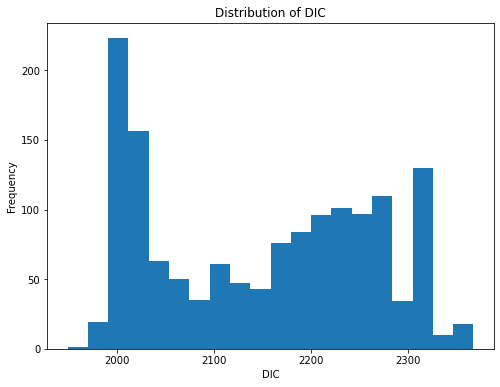

In [5]:
# Distribution of DIC in data
plt.figure(figsize=(8, 6))
plt.hist(data['DIC'], bins=20)
plt.xlabel('DIC')
plt.ylabel('Frequency')
plt.title('Distribution of DIC')
plt.show()

The distribution of DIC is somewhat bimodal, with beaks around 2000 and 2250. 

Next, let's look at a correlation heat map to better understand the features in the data and how they relate to one another.

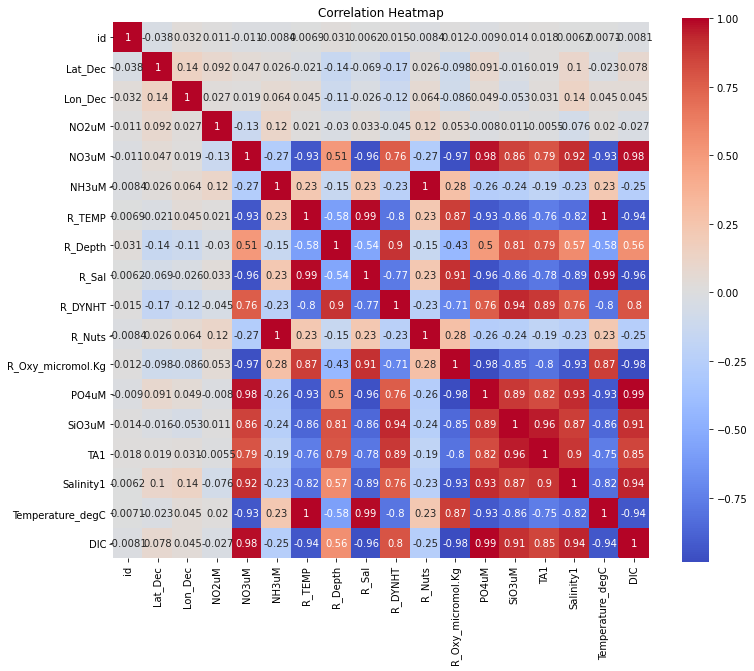

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

A quick glance at the heat map reveals that there are some strong relationships working in the data across the different features. While some are obviosuly 1 (like temperature in farenheit and celcius), closely examining the heatmap gives insights into how the features are related to each other, and points to the idea that it would be benefitial to look into the issue over multicollinearity this data. Multicollinearity arises when two or more features are highly correlated with each other, and it can lead to unreliable coefficient esimates and make the impact of individual features difficult. In this case, temperature in degrees farenheit and celcius are going to be identical and having one or the other will not change the predictions under random forest operators that we will be implementing. The issue of multicollinearity in this context can be skipped over since we are not as much concerened about interpreting each individual variable's coefficients, but rather the predictive power of a random forest model (or some other similar kind of ML algorithm).



<Figure size 864x720 with 0 Axes>

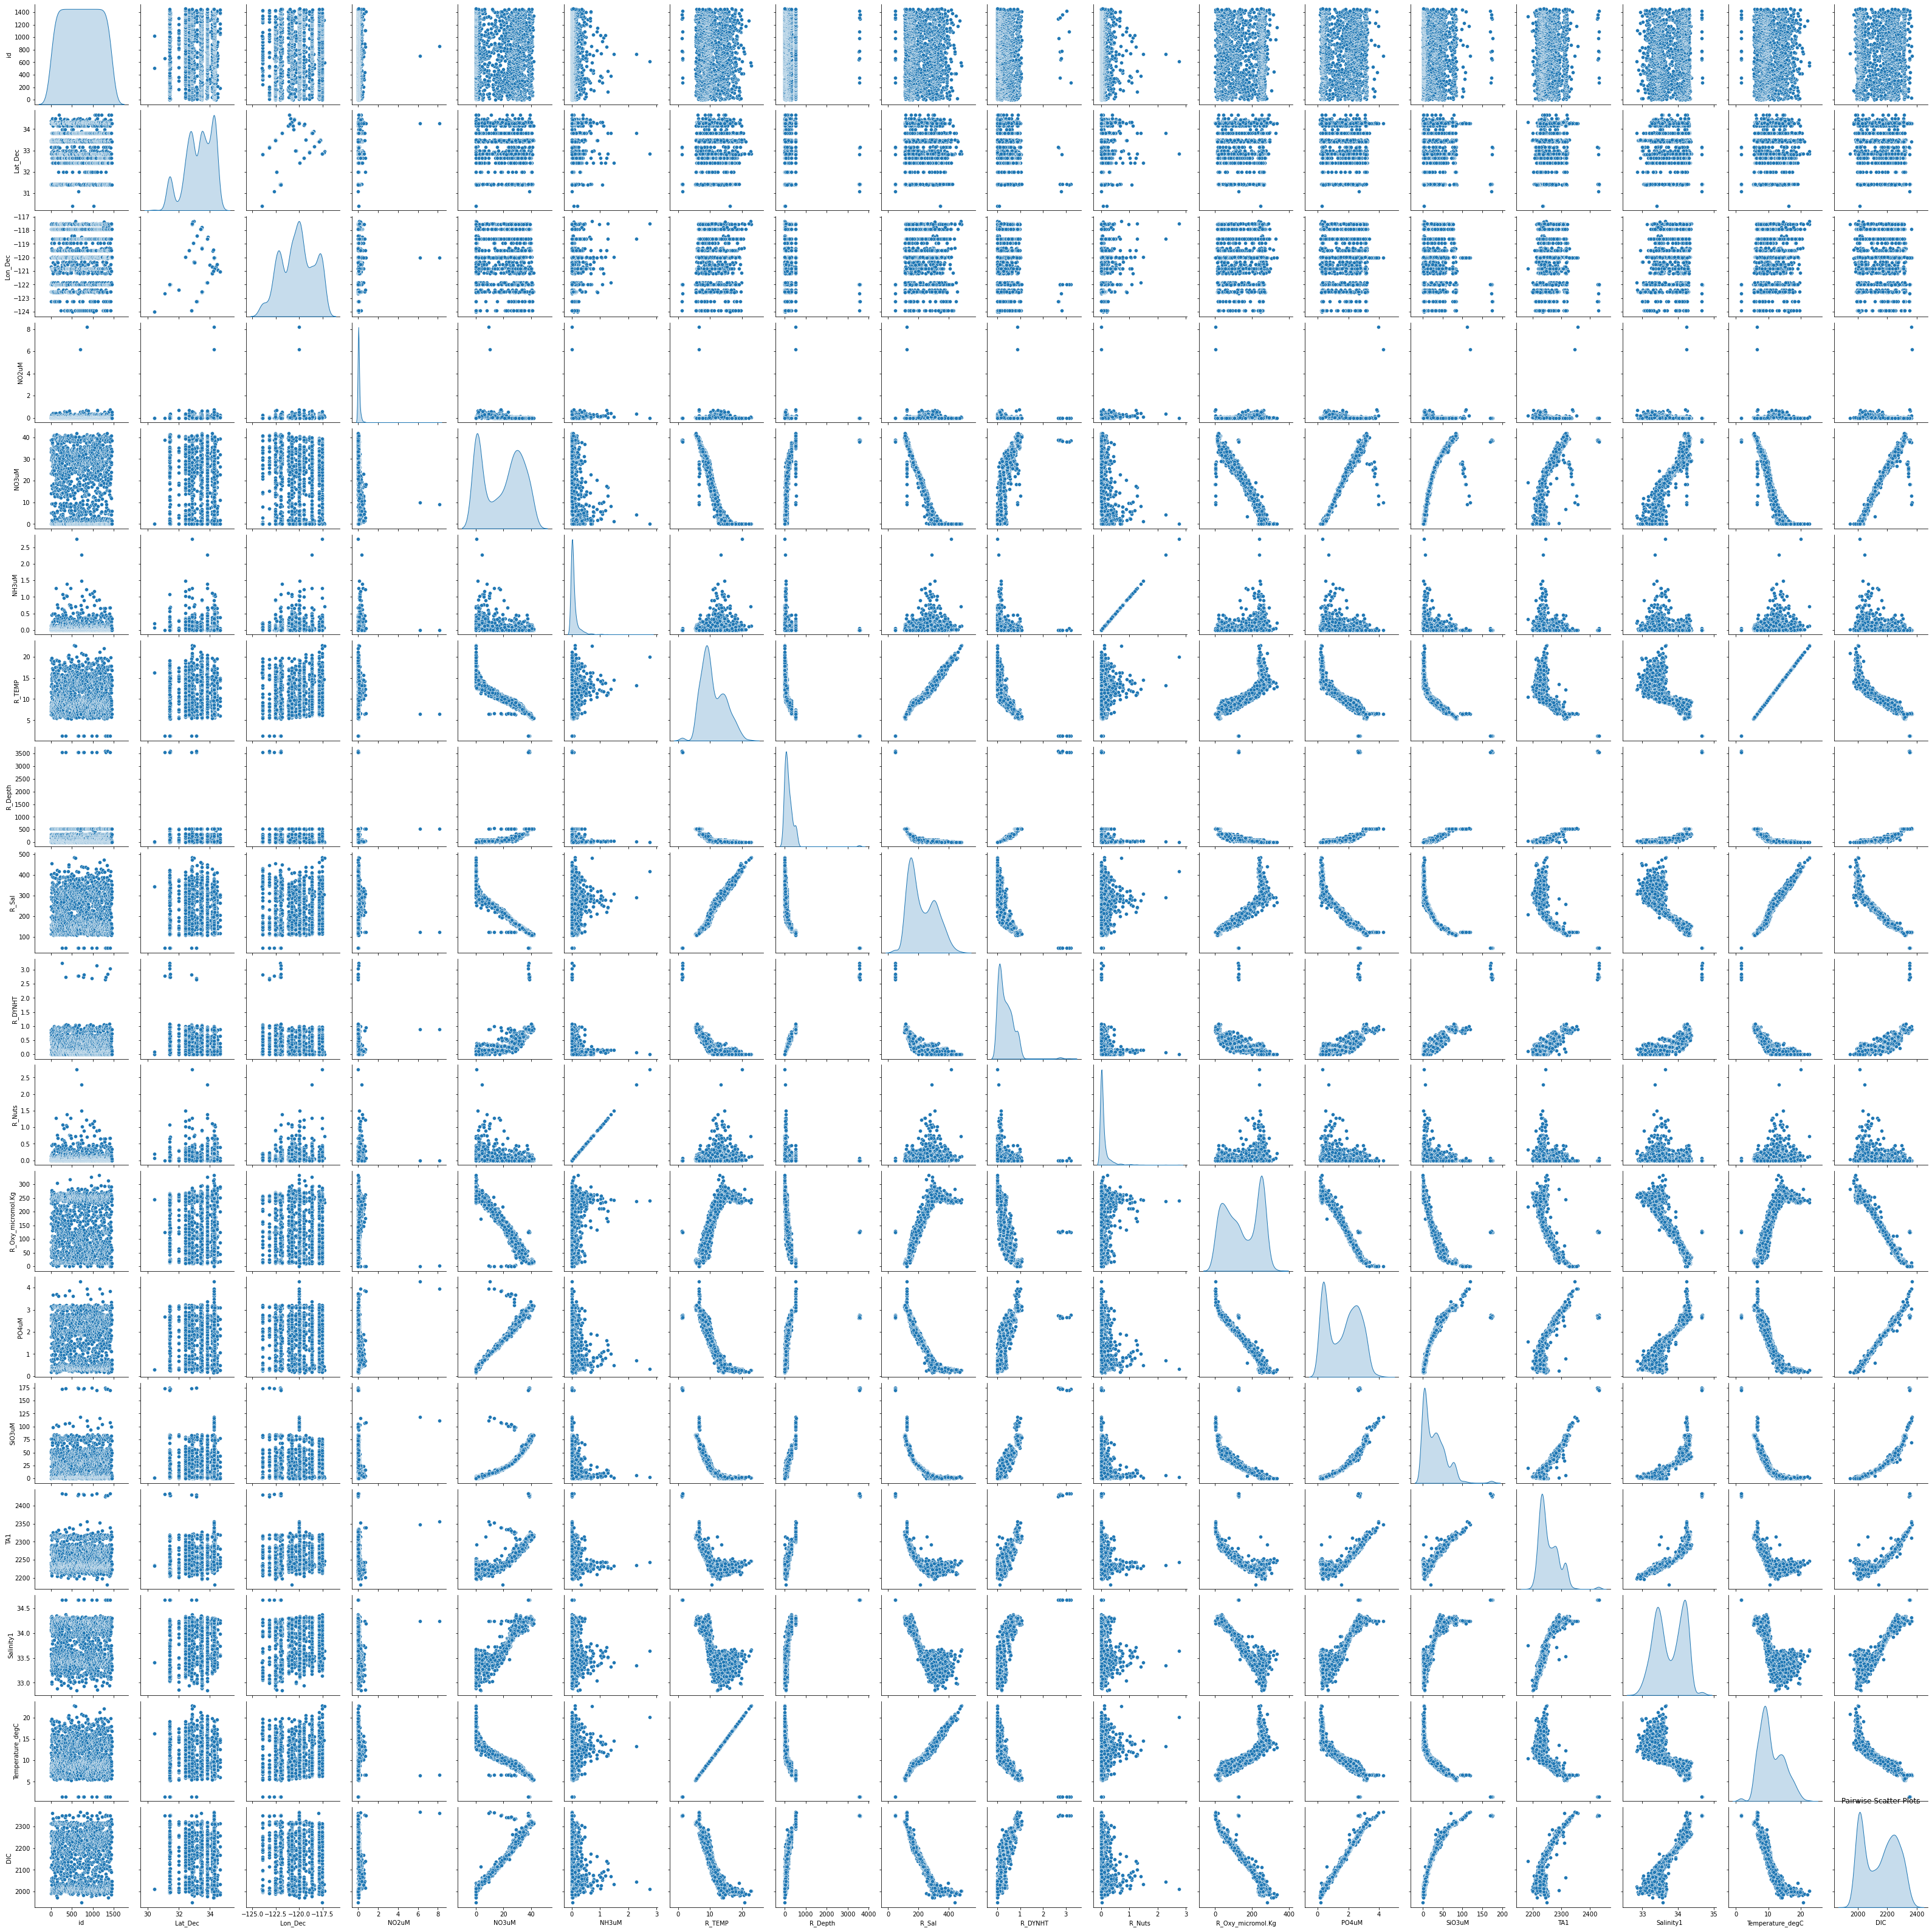

In [9]:
plt.figure(figsize=(12, 10))
sns.pairplot(data, diag_kind='kde')
plt.title('Pairwise Scatter Plots')
plt.show()

A gem of a chart. This shows the distribution of each variable against each other one, and then the distribution of each variable along the axis. This chart is very helpful for identifying redundant features and understanding the distribution of each column to check if normalizing the data would be a productive strategy.  

ADD NORMALIZATION STUFF HERE

Now, I'll go ahead and split the (training) data into training and testing sets, choosing an 80/20 split. 

In [13]:
# Remove highly correlated features from the training data
columns_to_remove = ['Temperature_degC', 'Salinity1', 'R_Nuts', 'R_Sal', 'R_DYNHT']

X = data.drop(['DIC'] + columns_to_remove, axis=1)
y = data['DIC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (1163, 12)
y_train : (1163,)
X_test : (291, 12)
y_test : (291,)


## Model Selection and Training
I started by choosing Random Forest as my model of choice to predict DIC levels, but I found that XGBoost performs stronger on the training and testing data so I opted for that one instead. 

I tried using both grid search and randomized search, and found that they perform similarly in terms of RMSE. However, grid search takes a lot longer to train and so I opted for randomized search in my final approach.

In [14]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid for random forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2']
}

# Define the parameter grid for AdaBoost
ada_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Create the base random forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search for random forest
rf_grid_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get the best random forest model
best_rf_model = rf_grid_search.best_estimator_

# Create the AdaBoost regressor with the best random forest as the base estimator
ada_model = AdaBoostRegressor(base_estimator=best_rf_model, random_state=42)

# Perform grid search for AdaBoost
ada_grid_search = RandomizedSearchCV(estimator=ada_model, param_distributions=ada_param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
ada_grid_search.fit(X_train, y_train)

# Get the best boosted random forest model
best_boosted_rf_model = ada_grid_search.best_estimator_

# Predict on the test set using the best boosted random forest model
predictions = best_boosted_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Root Mean Squared Error:", np.sqrt(mse))

# Prepare the actual test data features
test_data_features = test_data[X.columns]

# Make predictions on the actual test data using the best boosted random forest model
predictions_actual_test_data = best_boosted_rf_model.predict(test_data_features)

submission_df = pd.DataFrame({
    'id': test_data['id'],
    'DIC': predictions_actual_test_data
})

submission_csv_path = 'data/final_submission_boosted_rf_tuned_regularized.csv'
submission_df.to_csv(submission_csv_path, index=False)


/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Root Mean Squared Error: 6.031173120491283


Next is the code for the XGBoost model. First, I created a dictionary of parameter values for each of the hyperparameters to identify the best set of hyperparams. Then, the RandomizedSearchCV performs the random search, implementing cross-validation, 

In [15]:
# XGBoost

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingRegressor

param_distributions = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'alpha': [0, 0.1, 0.5, 1, 2],  # L1 regularization
    'lambda': [0, 0.1, 0.5, 1, 2],  # L2 regularization
    'objective': ['reg:squarederror'],
    'eval_metric': ['rmse'],
    'feature_selector': ['shuffle']  # Enable feature normalization
}

# Create a list to store the individual XGBoost models
models = []

# Number of models in the ensemble
n_models = 5

# Perform random search with cross-validation for each model
for i in range(n_models):
    # Create the XGBoost model
    xgb_model = xgb.XGBRegressor(random_state=42+i, objective='reg:squarederror', eval_metric='rmse', feature_selector='shuffle')
    
    # Perform random search
    random_search = RandomizedSearchCV(estimator=xgb_model, 
                                       param_distributions=param_distributions, 
                                       n_iter=50,  # Number of parameter settings to sample
                                       cv=5, 
                                       scoring='neg_mean_squared_error',
                                       verbose=1,
                                       random_state=42+i)
    random_search.fit(X_train, y_train)
    
    # Get the best model and add it to the list of models
    best_model = random_search.best_estimator_
    models.append(best_model)
    
    print(f"Best Parameters for Model {i+1}:", random_search.best_params_)

# Create the voting regressor
ensemble = VotingRegressor(estimators=[('model'+str(i), model) for i, model in enumerate(models)])

# Fit the ensemble on the training data
ensemble.fit(X_train, y_train)

# Get the best model and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Parameters:", best_params)

# Make predictions using the best model
# y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:43:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:43:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are no

Best Parameters for Model 1: {'subsample': 0.8, 'objective': 'reg:squarederror', 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'lambda': 0.5, 'feature_selector': 'shuffle', 'eval_metric': 'rmse', 'colsample_bytree': 0.8, 'alpha': 0.5}
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:44:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:44:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are no

Best Parameters for Model 2: {'subsample': 0.6, 'objective': 'reg:squarederror', 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05, 'lambda': 1, 'feature_selector': 'shuffle', 'eval_metric': 'rmse', 'colsample_bytree': 0.8, 'alpha': 1}
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:44:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:44:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:44:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:44:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are no

Best Parameters for Model 3: {'subsample': 0.9, 'objective': 'reg:squarederror', 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.05, 'lambda': 0.5, 'feature_selector': 'shuffle', 'eval_metric': 'rmse', 'colsample_bytree': 1.0, 'alpha': 2}
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:45:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:45:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:45:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:45:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are no

Best Parameters for Model 4: {'subsample': 1.0, 'objective': 'reg:squarederror', 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.05, 'lambda': 2, 'feature_selector': 'shuffle', 'eval_metric': 'rmse', 'colsample_bytree': 0.6, 'alpha': 0.1}
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:46:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:46:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:46:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:46:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are no

Best Parameters for Model 5: {'subsample': 0.6, 'objective': 'reg:squarederror', 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'lambda': 2, 'feature_selector': 'shuffle', 'eval_metric': 'rmse', 'colsample_bytree': 0.7, 'alpha': 2}


/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:46:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:47:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:47:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [21:47:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "feature_selector" } are no

Best Parameters: {'subsample': 0.6, 'objective': 'reg:squarederror', 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'lambda': 2, 'feature_selector': 'shuffle', 'eval_metric': 'rmse', 'colsample_bytree': 0.7, 'alpha': 2}


In [27]:
# Convert the dataset into a data structure that XGBoost supports
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Specify the number of cross-validation folds and the metrics for evaluation
cv_results_list = []
final_models = []

for model in models:
    cv_results = xgb.cv(
        dtrain=dtrain,
        params=model.get_params(),
        nfold=5,
        num_boost_round=500,
        early_stopping_rounds=50,
        metrics="rmse",
        as_pandas=True,
        seed=13
    )
    
    cv_results_list.append(cv_results)
    
    best_num_boost_round = len(cv_results)
    
    # Train the model with the best number of boosting rounds
    final_model = xgb.train(
        params=model.get_params(),
        dtrain=dtrain,
        num_boost_round=best_num_boost_round
    )
    
    final_models.append(final_model)

# Display the CV results for each model
for i, cv_results in enumerate(cv_results_list):
    print(f"CV Results for Model {i+1}:")
    print(cv_results)

# Predict on the test set using the ensemble
predictions = np.zeros(X_test.shape[0])
for model in final_models:
    predictions += model.predict(dtest)
predictions /= len(final_models)

# Evaluate the ensemble model
final_mse_cv = np.mean([cv_results['test-rmse-mean'].iloc[-1] for cv_results in cv_results_list])
print("Ensemble Root Mean Squared Error:", final_mse_cv)

# Remove the same columns from the test data
test_data_features = test_data.drop(columns_to_remove, axis=1)

# Create a DMatrix for the actual test data (test_data_features)
dtest_actual = xgb.DMatrix(test_data_features)

# Use the trained ensemble to make predictions on the actual test dataset
predictions_actual_test_data = np.zeros(test_data_features.shape[0])
for model in final_models:
    predictions_actual_test_data += model.predict(dtest_actual)
predictions_actual_test_data /= len(final_models)

submission_df = pd.DataFrame({
    'id': test_data['id'],  
    'DIC': predictions_actual_test_data
})

submission_csv_path = 'data/final_submission_ensemble_reg.csv' 
submission_df.to_csv(submission_csv_path, index=False)

/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [10:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "enable_categorical", "feature_selector", "missing", "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [10:40:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "enable_categorical", "feature_selector", "missing", "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [10:40:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "enable_categorical", "feature_selector", "missing", "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgbo

CV Results for Model 1:
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         106.902711        0.799519      106.931430       3.246993
1         101.640141        0.764599      101.665661       3.137076
2          96.637836        0.728240       96.660548       3.024005
3          91.878942        0.691320       91.917159       2.917533
4          87.357203        0.656431       87.398354       2.798133
..               ...             ...             ...            ...
495         0.143674        0.004883        6.322110       0.566449
496         0.143068        0.004853        6.322077       0.566466
497         0.142366        0.004850        6.322201       0.566506
498         0.141826        0.004822        6.322248       0.566510
499         0.141315        0.004830        6.322294       0.566534

[500 rows x 4 columns]
CV Results for Model 2:
     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         106.954718        0.798610      10

In [36]:
# Convert the dataset into a data structure that XGBoost supports
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameter sets for different XGBoost models
params_list = [
    {'learning_rate': 0.05, 'n_estimators': 500, 'max_depth': 3, 'subsample': 0.6, 'colsample_bytree': 0.6, 'alpha': 0.5},
    {'learning_rate': 0.05, 'n_estimators': 300, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 0.8, 'alpha': 1},
    {'learning_rate': 0.05, 'n_estimators': 400, 'max_depth': 4, 'subsample': 0.7, 'colsample_bytree': 0.7, 'alpha': 2}
]

# Create an empty list to store the trained models
models = []

# Train multiple XGBoost models with different parameter settings
for params in params_list:
    params['objective'] = 'reg:squarederror'
    params['random_state'] = 42
    
    cv_results = xgb.cv(
        dtrain=dtrain,
        params=params,
        nfold=10,
        num_boost_round=500,
        early_stopping_rounds=50,
        metrics="rmse",
        as_pandas=True,
        seed=13
    )
    
    best_num_boost_round = len(cv_results)
    
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=best_num_boost_round
    )
    
    models.append(model)

# Predict on the test set using each model and compute the average predictions
ensemble_predictions = np.zeros(dtest.num_row())
for model in models:
    predictions = model.predict(dtest)
    ensemble_predictions += predictions
ensemble_predictions /= len(models)

# Evaluate the ensemble model
final_mse_cv = mean_squared_error(y_test, ensemble_predictions)
print("Root Mean Squared Error:", np.sqrt(final_mse_cv))

# Prepare the actual test data features
test_data_features = test_data[X.columns]
dtest_actual = xgb.DMatrix(test_data_features)

# Make predictions on the actual test data using the ensemble model
ensemble_predictions_actual_test_data = np.zeros(dtest_actual.num_row())
for model in models:
    predictions_actual_test_data = model.predict(dtest_actual)
    ensemble_predictions_actual_test_data += predictions_actual_test_data
ensemble_predictions_actual_test_data /= len(models)

submission_df = pd.DataFrame({
    'id': test_data['id'],
    'DIC': ensemble_predictions_actual_test_data
})

submission_csv_path = 'data/final_submission_test.csv'
submission_df.to_csv(submission_csv_path, index=False)

/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [11:04:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [11:04:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [11:04:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maxwellpatterson/opt/anaconda3/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [11:04:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warni

Root Mean Squared Error: 5.605724732399557


## Model Evaluation and Interpretation
- Interpret the model results, including analyzing feature importances to understand which variables are most predictive of DIC levels
- Discuss any limitations or caveats to approach


In [37]:
# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', **best_params),
    X=X, y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Negative Mean Squared Error")
plt.plot(train_sizes, -train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, -test_scores.mean(axis=1), label="Cross-validation score")
plt.legend(loc="best")
plt.show()

TypeError: type object got multiple values for keyword argument 'objective'

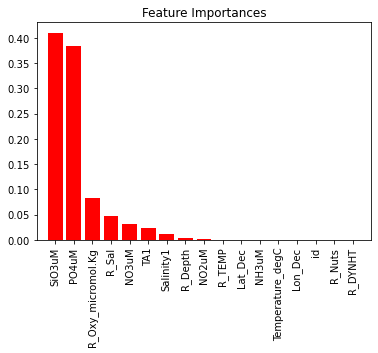

In [64]:
# Feature Importance
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
xgb_model.fit(X_train, y_train)

feature_importances = xgb_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [19]:
print("Training set sizes:", train_sizes)
print("Training scores (Negative MSE):\n", train_scores)
print("Validation scores (Negative MSE):\n", test_scores)

Training set sizes: [ 116  232  348  465  581  697  814  930 1046 1163]
Training scores (Negative MSE):
 [[-9.99956912e-05 -4.48875931e-05 -4.48875931e-05 -4.48875931e-05
  -4.48875931e-05]
 [-4.85965430e-03 -3.58756928e-03 -3.58756928e-03 -3.58756928e-03
  -3.58756928e-03]
 [-3.33106308e-02 -1.89585256e-02 -2.17123444e-02 -2.17123444e-02
  -2.17123444e-02]
 [-9.33256137e-02 -7.01989493e-02 -7.85154216e-02 -7.85154216e-02
  -7.85154216e-02]
 [-1.72739081e-01 -1.44003641e-01 -1.30381761e-01 -1.30381761e-01
  -1.30381761e-01]
 [-2.39533868e-01 -2.50730626e-01 -2.47338423e-01 -2.37732325e-01
  -2.37732325e-01]
 [-3.57112494e-01 -3.55847598e-01 -4.22327769e-01 -3.91398858e-01
  -3.91398858e-01]
 [-4.74316204e-01 -4.70541422e-01 -5.23268350e-01 -4.72926254e-01
  -5.08711505e-01]
 [-6.05465066e-01 -6.20304339e-01 -7.32547199e-01 -6.19882345e-01
  -5.86780844e-01]
 [-8.57564023e-01 -8.76077021e-01 -8.59182856e-01 -7.92936413e-01
  -7.84635593e-01]]
Validation scores (Negative MSE):
 [[ -88.89

In [65]:
learning_curve_data = pd.DataFrame({
    'Training Set Size': train_sizes,
    'Training Score (Negative MSE)': train_scores.mean(axis=1),
    'Validation Score (Negative MSE)': test_scores.mean(axis=1)
})

print(learning_curve_data)

   Training Set Size  Training Score (Negative MSE)  \
0                116                      -0.174085   
1                232                      -0.554602   
2                348                      -1.417830   
3                465                      -3.026339   
4                581                      -3.872808   
5                697                      -4.570602   
6                814                      -5.751246   
7                930                      -6.121061   
8               1046                      -6.432054   
9               1163                      -7.436974   

   Validation Score (Negative MSE)  
0                      -131.662397  
1                      -103.063132  
2                       -63.960419  
3                       -56.923273  
4                       -42.891631  
5                       -41.744880  
6                       -39.959630  
7                       -37.707325  
8                       -36.924082  
9                       

## Implications and Future Work
- Explain how predictive model could be useful for oceanographic research and understanding the carbon cycle
- Discuss potential applications of model, such as identifying areas of high or low DIC, or predicting future changes in ocean chemistry
- Suggest future work or improvements to analysis, such as incorporating additional data sources or trying more advanced modeling techniques

## Conclusion
- Summarize the key findings of analysis and the performance of machine learning model
- Reiterate the importance of understanding and predicting DIC levels in the ocean
- Encourage readers to explore the code and data further and contribute to oceanographic research

## Acknowledgments
- Acknowledge the CalCOFI program and any other sources of data or inspiration for your project